In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re

# Step 1: 读取数据（假设文件路径为 'med_data_cnki.xls'）
df = pd.read_excel('med_data_cnki.xlsx', sheet_name=0) # 根据实际情况修改文件路径

# Step 2: 检查数据是否成功读取
#print(df.head())

# Step 3: 统计单位（Organ）和文献来源（Source）

# 统计每个单位的文献数量
institution_counts = df['Organ-单位'].value_counts().head(10)

# 统计每个文献来源的文献数量
source_counts = df['Source-文献来源'].value_counts().head(10)

# 输出统计结果
print("Publications by Institution:")
print(institution_counts)

print("\nPublications by Source:")
print(source_counts)


Publications by Institution:
Organ-单位
郑州大学第一附属医院;互联网医疗系统与应用国家工程实验室;郑州大学管理工程学院;    5
郑州大学第一附属医院·互联网医疗系统与应用国家工程实验室;郑州大学管理工程学院;    4
郑州大学管理工程学院;郑州大学第一附属医院;互联网医疗系统与应用国家工程实验室;    3
郑州大学管理学院;郑州大学第一附属医院;互联网医疗系统与应用国家工程实验室;      3
南方医科大学卫生管理学院;                               3
广州医科大学卫生管理学院;                               3
武汉大学社会保障研究中心;                               3
广东外语外贸大学法学院;                                3
吉林大学商学与管理学院;                                3
郑州大学管理工程学院;郑州大学第一附属医院·互联网医疗系统与应用国家工程实验室;    3
Name: count, dtype: int64

Publications by Source:
Source-文献来源
中国卫生事业管理    27
中国医院管理      26
卫生经济研究      15
计算机科学       14
医学与社会       12
中国卫生资源      11
中国医院        11
计算机应用研究     10
医学与哲学       10
中国卫生经济       9
Name: count, dtype: int64


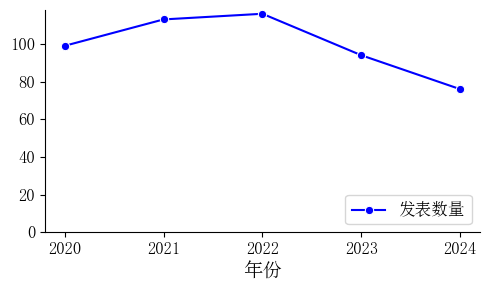

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 假设df已经加载并且包含了'Year-年'这一列
# 过滤掉2025年的数据
df_filtered = df[df['Year-年'] != 2025]

# 统计每年发表的文献数量
publication_counts = df_filtered['Year-年'].value_counts().sort_index()

# 设置字体为宋体，解决中文显示问题
plt.rcParams['font.family'] = 'SimSun'  # 设置字体为宋体

# 绘制折线图并添加图例
plt.figure(figsize=(5, 3))
sns.lineplot(x=publication_counts.index, y=publication_counts.values, marker='o', linestyle='-', color='b', label='发表数量')

# 设置学术规范样式
plt.xlabel("年份", fontsize=14)
plt.xticks(publication_counts.index, labels=[str(int(year)) for year in publication_counts.index], fontsize=12)  # 去除小数部分
plt.yticks(fontsize=12)
# 设置y轴从0开始
plt.ylim(bottom=0)

# 去掉上边和右边的框线
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# 显示图例，并将其放在右下角
plt.legend(loc='lower right', fontsize=12)

# 去掉网格线
# plt.grid(True)  # 删除这行以去除网格

plt.tight_layout()
plt.savefig('static/republication.png')
plt.show()


区块链          18
隐私保护         15
数据共享         13
大数据          13
医疗数据         12
医疗数据共享       10
数据安全          9
访问控制          9
人工智能          7
医疗保险          6
健康医疗数据        6
医疗费用          6
健康医疗大数据       6
医疗服务利用        5
智能合约          5
属性基加密         5
电子病历          5
医疗健康          5
智慧医疗          4
老年人           4


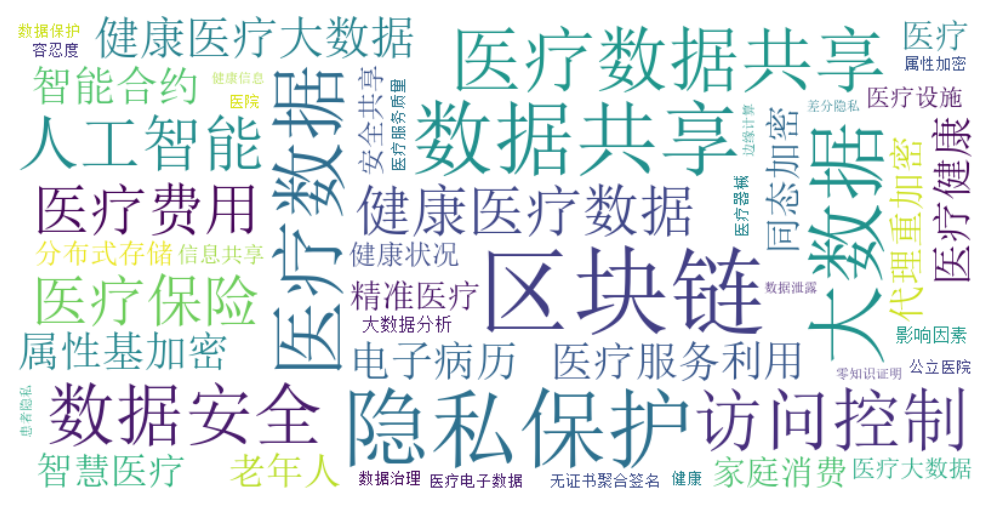

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import pandas as pd

font_path="C:/Windows/Fonts/simsun.ttc"

# 假设df已经加载，并包含了'Keyword-关键词'这一列
# 合并所有关键词并去掉缺失值
all_keywords = ' '.join(df['Keyword-关键词'].dropna())  # 合并所有关键词

# 对关键词进行分割，使用 `;;` 作为分隔符
keywords_list = all_keywords.split(';;')  # 使用;;作为分隔符


# 统计词频
keyword_counts = Counter([keyword.strip() for keyword in keywords_list if keyword.strip() != ''])  # 清理空白词

# 统计高频词汇
result = Counter(keyword_counts).most_common(200) #词的个数
 
# 建立词汇字典
content = dict(result)
#输出词频统计结果
for i in range(20):
    word,flag=result[i]
    print("{0:<10}{1:>5}".format(word,flag))

# 如果没有有效的关键词，直接返回提示
if len(keyword_counts) == 0:
    print("没有有效的关键词数据。")
else:
    # 创建词云图
    wordcloud = WordCloud(
        width=800,  # 增加画布宽度
        height=400,  # 增加画布高度
        background_color='white',
        max_words=50,
        colormap='viridis',  # 配色方案
        max_font_size=80,  # 限制最大字体大小
        margin=10,  # 减少每个词的间距
        font_path=font_path
    ).generate_from_frequencies(keyword_counts)

    # 绘制词云图
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # 不显示坐标轴
    plt.tight_layout()
    plt.savefig('static/wordcloud.png')
    plt.show()